# Deep Learning in Medicine
### BMSC-GA 4493, BMIN-GA 3007 
### Spring 2020
### Homework 1

**Learning Objectives**:

1. Basic Math Revision.
2. Introduction to Machine Learning.
3. Logistic Regression Model.
4. Multi-layer Perceptron Model.

**Instruction** 

1. If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex. See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues with writing equations. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

2. Upload and Submit your final jupyter notebook file in <a href='http://newclasses.nyu.edu '>newclasses.nyu.edu</a>

3. Deadline: Thursday Feb 20th 2020 (3pm) **

4. Questions and Clarification: <a href="https://piazza.com/nyumc.org/spring2020/bmscga4493andbminga3007/home"> Class Piazza</a>

5. ***HW submission instructions:*** Students should submit a zipped folder named netid_hwx where x is the hw number . The submission should consist of jupyter notebook with all the plots and expected outputs clearly visible in it. The zipped folder should also contain the data files. We should be able to run your ipynb without making directory changes. Not following the protocol might lead to deduction of scores.

---
# Question 1: Math and Machine Learning Revision (9 points)

### Take derivatives of functions from 1.1 to 1.5

In [1]:
import numpy as np
import pandas as pd

### 1.1. (1 point)

$f(x) = e^{3x + 9}$

substitute exponent for u

$f(x) = e^{u}$

$du/dx = 3$ 

$dy/du = 3 e^{u}$

$f'(x) = 3e^{3x + 9}$

### 1.2. (1 point)

$f(x) = \sqrt{\sum_{i=1}^{5}(a_i x)}$

$f(x) = \sqrt{u}$

$u = \sum_{i=1}^{5}(a_i x)$

$du/dx = u^{1/2}$

$du/dx = 1/2u^{-1/2}$

$dy/du = \sum_{i=1}^{5}(a_i x)$

$dy/du = \sum_{i=1}^{5}(a_i)$

$f'(x) = \frac{1}{2\sqrt{\sum_{i=1}^{5}(a_ix)a_i}}$

### 1.3. (1 point)

$f(x) = ln(2^x)$

substitute u for 2x

$f(x) = ln(u)$

$\frac{du}{dx} = 1/u$

$u = 2^{x}$

$2 = e^{ln 2}$

$u = (e^{ln 2})^{x}$

$dy/du = ln2(e^{(ln 2)x}) $

$= 2^{x} (ln2)$

plug this back into the first derivative

$f'(x) = 1/ (2^{x} (ln2))$

$f'(x) = (1/ 2^{x}) * (1/ln2)$

$f'(x) = e/ 2^{x}$

### 1.4. (1 point)

$f(x) = ln(3^x * 9^x)$

$f(x) = ln(u)$

$\frac{du}{dx} = 1/u$

$u = 3^x * 9^x$

$a = 3^x$

$b = 9^x$

$ ln(a)  = ln(3^{x})$

$ = x * ln(3)$

$da/dx = a * ln(3)$

$da/dx = 3^{x} ln(3)$

$db/dx = 9^{x} ln(9)$

$du/dx = 9^{x} ln(9)* 3^{x} ln(3)$

$dy/du = \frac{1}{9^{x} ln(9)* 3^{x} ln(3)}$

### 1.5. (1 point)

$f(x) = ln(e^{2x +1})$

$f(x) = ln(u)$

$f'(x) = 1/u$

$u = e^{a}$

$da/dx = 2$ 

$du/da = 2 e^{a}$

$du/da = 2 e^{2x + 1}$

$f'(x) = \frac{1}{2 * e^{2x + 1}}$

### 1.6. Assume we have two coins. Imagine the first coin is fair and has a probability distribution P, where P(head) = 0.5 and P(tail) = 0.5. Assume second coin is not fair and has a different distribution Q, where Q(head)=0.1 and Q(tail)=0.9. 

#### 1.6.a. What is entropy of P distribution? (1 point)

entropy is maximal since it is neither certain to get heads or tails

${{H} (X)=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{2}\mathrm {P} (x_{i})}}$

plug in the probability for heads on one coin flip:

${{H} (X)=-\sum _{i=1}^{n}{\mathrm 1/2 \log _{2}\mathrm 1/2}}$


${{H} (X)=-\sum _{i=1}^{n}{\mathrm 1/2 (-1)}} = 1$


#### 1.6.b. What is entropy of Q distribution? (1 point)

"reduced uncertainty is quan
tified in a lower entropy"

$H(X) = -Q(head)\log _{2}(Q(head)) - Q(tail)\log _{2}(Q(tail))$

$H(X) = -.9\log _{2}(.9) - .1\log _{2}(.1)$

In [2]:
-.9 * np.log2(.9) - .1 * np.log2(.1)

0.4689955935892812

#### 1.6.c. What is cross-entropy between P and Q i.e. CE(P,Q)? (1 point)


H(P, Q) =H(P) +DKL(P Q)

In [3]:
p = [.5,.5]
q = [.1, .9]

In [4]:
# calculate cross entropy
# https://machinelearningmastery.com/cross-entropy-for-machine-learning/
def cross_entropy(p, q):
    return -sum([p[i]*np.log2(q[i]) for i in range(len(p))])

In [5]:
cross_entropy(p, q)

1.736965594166206

#### 1.6.d. What is the cross-entropy between Q and P i.e. CE(Q,P)? (1 point)

H(P, Q) =H(P) +DKL(P Q)

In [6]:
cross_entropy(q, p)

1.0

---
# Question 2: Solving Linear Regression via Mean Squared Error (MSE) Optimization Problem (30 points)

Imagine that you have measured two variables X and Y, for a simple task, and you belive that they might be linearly related to each other. Here, our input X has 2 dimensions, and the output has 1 dimension. We will use super-script to indicate which sample it is, and sub-scipt to indicate which dimension it is. 
The measurements are as follows:

###### (Training data D = {($X^1$, $Y^1$), ($X^2$, $Y^2$), ($X^3$, $Y^3$)})

Sample 1: $X^1 = (x_1^1, x_2^1) = (2, 2)$,   $Y^1$ = 5

Sample 2: $X^2 = (x_1^2, x_2^2) = (2, 7)$,   $Y^2$ = 3

Sample 3: $X^3 = (x_1^3, x_2^3) = (-1, 0)$,   $Y^3$ = 1



If we assume that the relationship between X and Y is linear, we can write this relationship as:

$Y = f_{W,B}(X) = WX + B = w_1*x_1 + w_2*x_2 + B$

where $W = (w_1, w_2)$ and $B$ are the parameters of the model.	
We are interested in finding best values for W and B.	
We define 'best' in terms of a loss function between $f_{W,b}(X_i)$ and $Y_i$ for each ($X_i$ and $Y_i$) in the training data. 	
Since $Y_i$s are real numbers, let's consider Mean Squared Error loss. 

Remember that Mean Squared Error for this function, over training data, and W and B is:

$MSELoss(D={(X_1, Y_1), (X_2, Y_2), (X_3, Y_3)}), W, B) = \frac{1}{3}\sum_{i=1}^{3} (f_{W,B}(X_i) - Y_i)^2 $

### 2.1. (6 points)
Compute the partial derivative of $MESLoss(D, W, B)$, With respect to W and B.	
Remember that $X_1$, $X_2$, $X_3$, $Y_1$, $Y_2$, and $Y_3$ are constants, and already given to us as training data above.

$\frac{d}{d w_1} MSELoss(D, W, B) = ?$





$\frac{1}{3}\sum_{i=1}^{3} (f_{W,B}(X_i) - Y_i)^2 $

$=\frac{1}{3}u^2$

$\frac{du}{dx} = \frac{2}{3}u$

$u = \sum_{i=1}^{3} (w_1*x_1 + w_2*x_2 + B- Y^i)$

if w1 is the only variable of interest, we pretend that all other varibles are constants. x1 is the coeffiecient of w1 so its the only thing left

$\frac{d}{d w_1} = \frac{2}{3}\sum_{i=1}^{3} (f_{W,B}(X^i) - Y^i)x_1^i$

plug in the known constants

$\frac{d}{d w_1}  = 2(3w_1 + 6w_2 + B -5$)

In [7]:
#make into a funtion to be used below
def w1_der(w1, w2, B):
    return 2*(3*w1+6*w2+B-5)

$\frac{d}{d w_2} MSELoss(D, W, B) = ?$

$\frac{d}{d w_2} = \frac{2}{3}\sum_{i=1}^{3} (f_{W,B}(X^i) - Y^i)x_2^i$

plug in the known constants

$\frac{d}{d w_2} = \frac{2}{3}(18w_1+53w_2+9B -31)$

In [8]:
#make into a funtion to be used below
def w2_der(w1, w2, B):
    return 2/3*(18*w1+53*w2+9*B-31)

$\frac{d}{d B} MSELoss(D, W, B) = ?$

$\frac{d}{d B} = \frac{2}{3}\sum_{i=1}^{3} (f_{W,B}(X^i) - Y^i)$

plug in the known constants

$\frac{d}{d B} = \frac{2}{3}(3w_1+9w_2+3B-9)$

In [9]:
#make into a funtion to be used below
def B_der(w1, w2, B):
    return 2/3*(3*w1+9*w2+3*B-9)

### 2.2. (6 points)
Use matplotlib library and plot $\frac{d}{d w1} MSELoss(D, W, B)$ for $w_1 = np.arange(0, 3, 0.5)$, when $w_2$ equals 1, and B equals to -5.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
w1 = np.arange(0, 3, 0.5)
# plot dMSELoss/dw1 here:

$\frac{d}{d w_1}  = 2(3w_1 + 6w_2 + B -5$)

$\frac{d}{d w_1}  = 2(3w_1 -4$)

$\frac{d}{d w_1}  = 6w_1 -8$

In [11]:
def plot_w1(w1):
    return w1*6 - 8

In [12]:
𝑛𝑝.𝑎𝑟𝑎𝑛𝑔𝑒(0,3,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [13]:
w1_output = []
for w in 𝑛𝑝.𝑎𝑟𝑎𝑛𝑔𝑒(0,3,0.5):
    w1_output.append(plot_w1(w))

In [14]:
plt.style.use('fivethirtyeight')

In [15]:
w1_output

[-8.0, -5.0, -2.0, 1.0, 4.0, 7.0]

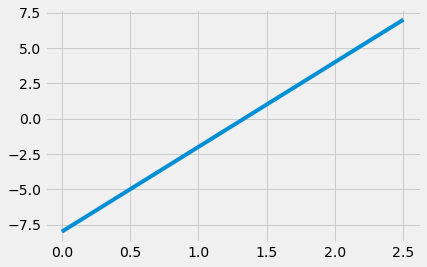

In [16]:
plt.plot(𝑛𝑝.𝑎𝑟𝑎𝑛𝑔𝑒(0,3,0.5), w1_output)

### 2.3. (6 points)
What values of $w_1$, $w_2$ and $B$, make all partial derivatives zero?

In [17]:
A = np.array([[3, 9, 3], [18, 53, 9], [3, 6, 1]])
B = np.array([9, 31, 5])
X = np.linalg.solve(A,B)

print(X)

[ 1.6 -0.4  2.6]


In [18]:
print(w1_der(X[0], X[1], X[2]))
print(w2_der(X[0], X[1], X[2]))
print(B_der(X[0], X[1], X[2]))

0.0
0.0
0.0


In [19]:
f'''w1 is {round(X[0], 4)}, w2 is {round(X[1], 4)}, B is {round(X[2], 4)}'''

'w1 is 1.6, w2 is -0.4, B is 2.6'

### 2.4. (6 points)
If you start from an initial point $w_1^0 = 0.1$ , $w_2^0 = 0.1$ and $B^0 = 0.1$, and iteratively update your $w_1$, $w_2$, and B via gradient descent as follows:
    
$ w_1^{t+1} = w_1^t - 0.01 * \frac{d}{d w_1} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
$ w_2^{t+1} = w_2^t - 0.01 * \frac{d}{d w_2} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
$ B^{t+1} = B^t - 0.01 * \frac{d}{d B} MSELoss(D, W, B) |_{w_1^t,w_2^t,B^t} $	
(Note: This is gradient descent with a 0.01 learning rate.)

What are the values of Ws and B over iterations 0 to 50? (Don't compute by hand! Write a code!)	
Write a python script that computes these values for 50 iterations, i.e. lists of $\{w_1^0, w^1_1,.., w_1^{50}\}$, $\{w_2^0, w_2^1,.., w_2^{50}\}$, and $\{B^0, B^1,.., B^{50}\}$.	
Plot the lists of $w_1$s, $w_2$s and Bs over 50 iterations.



In [20]:
#set rate and starting values
rate = .01
w1_current = .1
w2_current = .1
B_current = .1
weight_dict = {'w1': [], 
           'w2': [], 
            'B': []
          }
# 50 iterations
for x in range(51):
    #continue to append to dict of lists
    weight_dict['w1'].append(w1_current)
    weight_dict['w2'].append(w2_current)
    weight_dict['B'].append(B_current)
    #transform base
    w1 = w1_current-rate*(w1_der(w1_current, w2_current, B_current))
    w2 = w2_current-rate*(w2_der(w1_current, w2_current, B_current))
    B = B_current-rate*(B_der(w1_current, w2_current, B_current))
    #once all is transformed, set to current
    w1_current = w1
    w2_current = w2
    B_current = B

In [21]:
# test quantity of outputs
for k, v in weight_dict.items():
    print (k)
    print (len(v))

w1
51
w2
51
B
51


Text(0.5, 0, 'epoch')

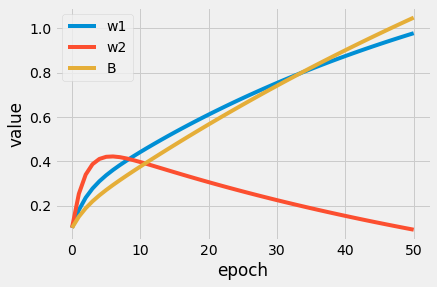

In [22]:
pd.DataFrame(weight_dict).plot()
plt.ylabel('value')
plt.xlabel('epoch')

### 2.5. (6 points)
Now that you learned the math and made the code yourself, we will use pytorch and automatic differentiation, to find optimal W and B!	
Again, consider data to be D = {($X_1$, $Y_1$), ($X_2$, $Y_2$), ($X_3$, $Y_3$)}) = {((2,2), 5), ((2,7), 3), ((-1,0), 1)}.

Some of your steps are here. Fill in the rest and show a plot of the loss function, $w_1$, $w_2$ and B over these 10 epochs.

In [23]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim
import random

In [24]:
from torch.autograd import Variable

In [25]:
D = [((2,2), 5), ((2,7), 3), ((-1,0), 1)]
X = [d[0] for d in D]
Y = [d[1] for d in D]
X = np.array(X)
Y = np.array(Y)
print('data X is:', X)
print('data Y is:', Y)

model = torch.nn.Linear(2, 1, bias=True)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

losslist = []
w1list = []
w2list = []
blist = []

#plot the losslist, w1s, w2s, and bs.

data X is: [[ 2  2]
 [ 2  7]
 [-1  0]]
data Y is: [5 3 1]


In [26]:
c = list(zip(X, Y))
random.shuffle(c)
a, b = zip(*c)

In [27]:
X = np.array(X)

In [28]:
model = torch.nn.Linear(2, 1, bias=True)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

losslist = []
w1list = []
w2list = []
blist = []

for epoch in range(10+1):
    # Shuffle your training data samples
    # random.seed(666) do not want it to be the same shuffle everytime
    c = list(zip(X, Y))
    random.shuffle(c)
    X, Y = zip(*c)
    #make into an array after shuffle
    X = np.array(X)
    Y = np.array(Y)
    
    # Loop over your training data in the new order:
    # reference piazza answer from instructor "You can feed all data, 
    # given that you have only 3 data points."
#     for i in X:
    #dont forget to: optimizer.zero_grad()
    model.train()
    optimizer.zero_grad()

    #prepare your x_input and y_target if needed
    # reverse engineered from here https://discuss.pytorch.org/t/how-to-cast-a-tensor-to-another-type/2713/2
    x_input, y_target = torch.from_numpy(X),torch.from_numpy(Y)
    x_input, y_target = x_input.type(torch.FloatTensor),y_target.type(torch.FloatTensor)

    #send the data through your model: i.e. pred_i = model(x_input)
    pred_i = model(x_input).squeeze()
    #send the prediction through the loss function too: i.e. lossout= loss(pred_i, y_target)
    lossout= loss(pred_i, y_target)
    #call backward to back-propagate: i.e. lossout.backward()
    lossout.backward()
    #call optimizer.step() to update the model parameters based on the computed gradients
    optimizer.step()

    #keep the w1s, w2s, and bs, and loss value some list so you can plot them later
    w1, w2 = model.weight.data.numpy()[0]
    b = model.bias.data.numpy()[0]

    losslist.append(float(lossout.data.numpy()))
    w1list.append(w1)
    w2list.append(w2)
    blist.append(b)

In [29]:
blist

[0.1611732,
 0.189209,
 0.21420862,
 0.23734005,
 0.2592969,
 0.28049123,
 0.30116796,
 0.3214729,
 0.34149298,
 0.36128017,
 0.38086575]

In [30]:
w1list

[-0.04660128,
 -0.006374188,
 0.027536705,
 0.057533007,
 0.08504286,
 0.11091659,
 0.13566157,
 0.15958159,
 0.18285955,
 0.2056066,
 0.2278912]

In [31]:
len(losslist)

11

In [32]:
#plot the losslist, w1s, w2s, and bs.

In [33]:
plt_dict = {'Loss': losslist, 
            'Weight 1': w1list, 
            'Weight 2': w2list, 
            'Bias': blist}

In [34]:
losslist

[6.047016143798828,
 5.485018253326416,
 5.206766128540039,
 5.0305609703063965,
 4.892342567443848,
 4.769490718841553,
 4.653981685638428,
 4.542933940887451,
 4.435279369354248,
 4.33059024810791,
 4.228666305541992]

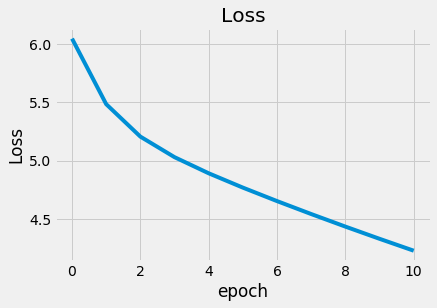

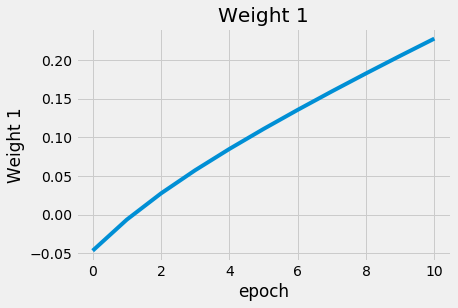

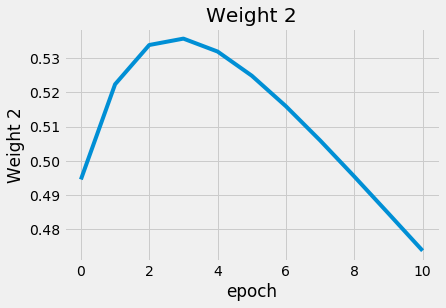

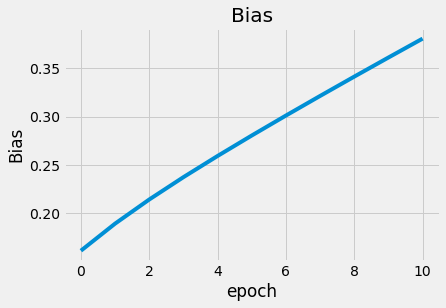

In [35]:
for k,v in plt_dict.items():
    plt.plot(v)
    plt.title(k)
    plt.xlabel('epoch')
    plt.ylabel(k)
    plt.show()

# Question 3: Learning Curves, Overfitting, and Machine Learning! (61 points)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

Now we know how to optimize, let's get some real machine learning done!	

Instead of the small dataset we had in questions 2 and 3, now let's use the the CBIS-DDSM (Curated Breast Imaging Subset of DDSM) dataset from <a href="https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM#385f2cd4e86f4142b1d32bdb5803bd96"> here</a>


In this homework, we will *only* focus on the following items in the dataset:	
Mass-Training-Description (csv)	
Mass-Test-Description (csv)	
(Don't download the images on your laptop! That file is too big and we deal with it on the cluster later!)

This dataset contains several features related to Mammography and detection of breast cancer. 

The Mass-Training-Description and Mass-Test-Description include these columns:

patient_id	
breast_density	
left or right breast	
image view		
abnormality id		
abnormality type	
mass shape	
mass margins	
assessment	
pathology

There is more data in this dataset, including images, but for this homework we will not focus on them.

We are interested in this question:	
Using variables:	

breast_density	
left or right breast	
image view		
abnormality id		
abnormality type	
mass shape	
mass margins	

How well can we predict the **pathology type**?

We can answer that by training a model on the Mass-Training-Description, and evaluating it on Mass-Test-Description. 
See questions 3.1 and 3.2



In [37]:
test = pd.read_csv('mass_case_description_test_set.csv')

In [38]:
train = pd.read_csv('mass_case_description_train_set.csv')

In [39]:
test.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [40]:
train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


### 3.1. (10 points)
Write a script to prepare input [breast_density, left or right breast, image view, abnormality id,
abnormality type, mass shape, mass margins] and output [pathology type].

The output of your script should be a matrix X and a vector Y, where each row of X are one set of variables for a patient, and each row of Y is the pathology type class, for that patient.	

Use *matplotlib.imshow* to visualize the X.	
(And if there are multiple equivalent rows per patient, keep only one of them - any, up to you)


In [41]:
train.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [42]:
test.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [43]:
#find intersection of the two 

In [44]:
for x in train[['breast_density', 
            'left or right breast', 
            'image view', 
            'abnormality id', 
            'abnormality type', 
            'mass shape', 'mass margins']]:
    print (train[x].unique())

[3 2 1 4]
['LEFT' 'RIGHT']
['CC' 'MLO']
[1 2 3 4 5 6]
['mass']
['IRREGULAR-ARCHITECTURAL_DISTORTION' 'ARCHITECTURAL_DISTORTION' 'OVAL'
 'IRREGULAR' 'LYMPH_NODE' 'LOBULATED-LYMPH_NODE' 'LOBULATED'
 'FOCAL_ASYMMETRIC_DENSITY' 'ROUND' 'LOBULATED-ARCHITECTURAL_DISTORTION'
 'ASYMMETRIC_BREAST_TISSUE' 'LOBULATED-IRREGULAR' nan 'OVAL-LYMPH_NODE'
 'LOBULATED-OVAL' 'ROUND-OVAL' 'IRREGULAR-FOCAL_ASYMMETRIC_DENSITY'
 'ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION' 'ROUND-LOBULATED']
['SPICULATED' 'ILL_DEFINED' 'CIRCUMSCRIBED' 'ILL_DEFINED-SPICULATED'
 'OBSCURED' 'OBSCURED-ILL_DEFINED' nan 'MICROLOBULATED'
 'MICROLOBULATED-ILL_DEFINED-SPICULATED' 'MICROLOBULATED-SPICULATED'
 'CIRCUMSCRIBED-ILL_DEFINED' 'MICROLOBULATED-ILL_DEFINED'
 'CIRCUMSCRIBED-OBSCURED' 'OBSCURED-SPICULATED'
 'OBSCURED-ILL_DEFINED-SPICULATED' 'CIRCUMSCRIBED-MICROLOBULATED']


In [45]:
for x in test[['breast_density', 
            'left or right breast', 
            'image view', 
            'abnormality id', 
            'abnormality type', 
            'mass shape', 'mass margins']]:
    print (test[x].unique())

[4 2 3 1]
['LEFT' 'RIGHT']
['CC' 'MLO']
[1 2 4 3]
['mass']
['IRREGULAR' 'ROUND' 'LOBULATED' 'OVAL'
 'IRREGULAR-ARCHITECTURAL_DISTORTION' 'ASYMMETRIC_BREAST_TISSUE'
 'ARCHITECTURAL_DISTORTION' 'LYMPH_NODE' 'OVAL-LOBULATED'
 'IRREGULAR-ASYMMETRIC_BREAST_TISSUE' 'LOBULATED-LYMPH_NODE'
 'FOCAL_ASYMMETRIC_DENSITY' 'LOBULATED-IRREGULAR']
['SPICULATED' 'CIRCUMSCRIBED' 'ILL_DEFINED' 'OBSCURED'
 'ILL_DEFINED-SPICULATED' 'MICROLOBULATED' 'OBSCURED-CIRCUMSCRIBED' nan
 'CIRCUMSCRIBED-SPICULATED' 'CIRCUMSCRIBED-OBSCURED-ILL_DEFINED'
 'OBSCURED-ILL_DEFINED-SPICULATED' 'OBSCURED-ILL_DEFINED'
 'CIRCUMSCRIBED-ILL_DEFINED' 'CIRCUMSCRIBED-MICROLOBULATED'
 'CIRCUMSCRIBED-OBSCURED' 'MICROLOBULATED-ILL_DEFINED'
 'CIRCUMSCRIBED-MICROLOBULATED-ILL_DEFINED']


In [46]:
train.shape

(1318, 14)

In [47]:
test.shape

(378, 14)

In [48]:
df = pd.concat([test, train],keys=['test', 'train']).reset_index()

In [49]:
df.head()

,level_0,level_1,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,test,0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,test,1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,test,2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,test,3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,test,4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [50]:
def data_prep(df):
    # get the first record for each patient
    output = df.groupby('patient_id').first().reset_index()
    output['abnormality id'] = output['abnormality id'].apply(str)
    X = pd.get_dummies(output[[
                               'breast_density', 
            'left or right breast', 
            'image view', 
            'abnormality id', 
            'abnormality type', 
            'mass shape', 'mass margins']], drop_first=True)
    y = output['pathology'].astype('category').cat.codes
    X_test = X[output['level_0']=='test']
    X_train = X[output['level_0']=='train']
    y_test = y[output['level_0']=='test']
    y_train = y[output['level_0']=='train']
    return X_test, X_train, y_test, y_train

In [51]:
output_testing = df.groupby('patient_id').first().reset_index() 
y_testing = output_testing['pathology'].astype('category').cat.codes
y_testing_no_cat = output_testing['pathology']

In [52]:
# changed y into category values. Malignant is 2, benign is 0 and benign without callback is 1

In [53]:
y_testing.value_counts()

2    419
0    399
1     74
dtype: int64

In [54]:
y_testing_no_cat.value_counts()

MALIGNANT                  419
BENIGN                     399
BENIGN_WITHOUT_CALLBACK     74
Name: pathology, dtype: int64

In [55]:
X_test, X_train, y_test, y_train = data_prep(df)

In [56]:
X_test.shape

(201, 42)

In [57]:
X_train.shape

(691, 42)

In [58]:
y_test.shape

(201,)

In [59]:
y_train.shape

(691,)

In [60]:
X_test.columns

Index(['breast_density', 'left or right breast_RIGHT', 'image view_MLO',
       'abnormality id_2', 'abnormality id_3', 'abnormality id_4',
       'mass shape_ASYMMETRIC_BREAST_TISSUE',
       'mass shape_FOCAL_ASYMMETRIC_DENSITY', 'mass shape_IRREGULAR',
       'mass shape_IRREGULAR-ARCHITECTURAL_DISTORTION',
       'mass shape_IRREGULAR-ASYMMETRIC_BREAST_TISSUE',
       'mass shape_IRREGULAR-FOCAL_ASYMMETRIC_DENSITY', 'mass shape_LOBULATED',
       'mass shape_LOBULATED-ARCHITECTURAL_DISTORTION',
       'mass shape_LOBULATED-IRREGULAR', 'mass shape_LOBULATED-LYMPH_NODE',
       'mass shape_LYMPH_NODE', 'mass shape_OVAL', 'mass shape_OVAL-LOBULATED',
       'mass shape_OVAL-LYMPH_NODE', 'mass shape_ROUND',
       'mass shape_ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION',
       'mass shape_ROUND-LOBULATED', 'mass shape_ROUND-OVAL',
       'mass margins_CIRCUMSCRIBED-ILL_DEFINED',
       'mass margins_CIRCUMSCRIBED-MICROLOBULATED',
       'mass margins_CIRCUMSCRIBED-MICROLOBULATED-ILL_DEFI

In [61]:
#abnormality type gets dropped since there is only one

In [62]:
#dont want to dummy density as it seems to be a continuous variable

In [63]:
# clear variation of density is more variying than the binary variables

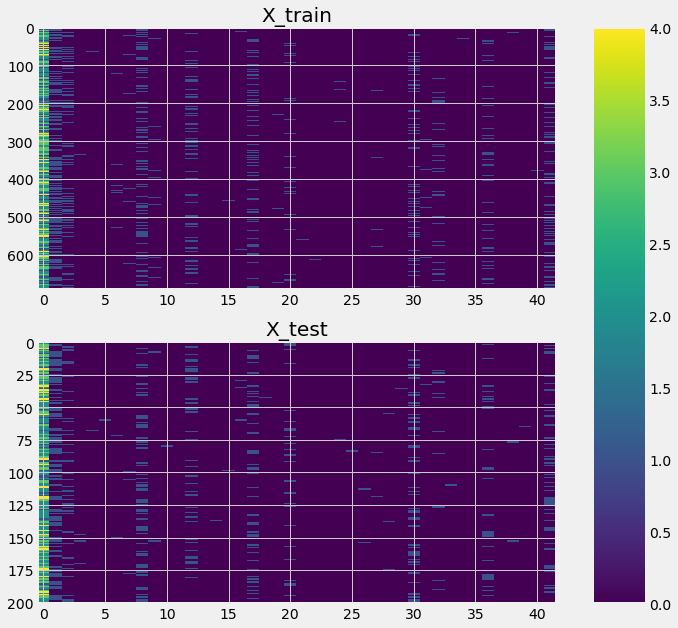

In [64]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('X_train')
plt.imshow(X_train, interpolation='nearest', aspect='auto')
plt.subplot(212)
plt.title('X_test')
plt.imshow(X_test, interpolation='nearest', aspect='auto')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [65]:
#possibly try to set the x ticks? 

In [66]:
# two different views of y-- one with dummies and one with categories

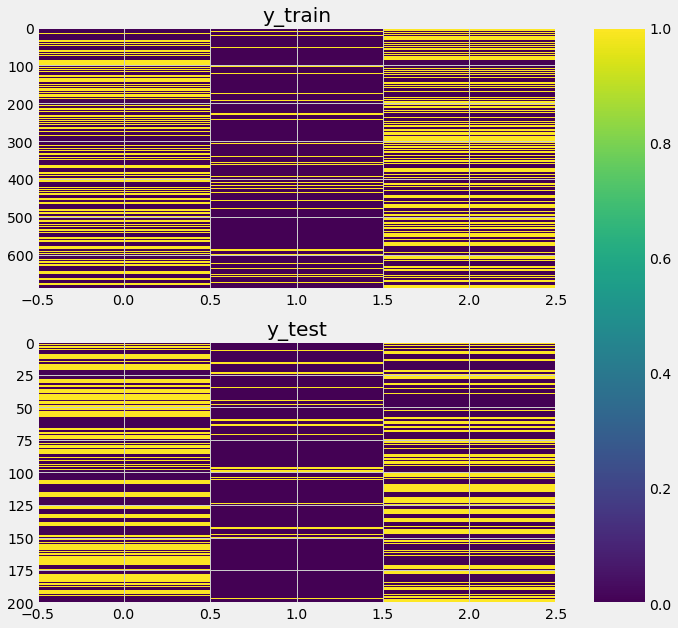

In [67]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('y_train')
plt.imshow(pd.get_dummies(y_train.astype(str)), interpolation='nearest', aspect='auto')
plt.subplot(212)
plt.title('y_test')
plt.imshow(pd.get_dummies(y_test.astype(str)), interpolation='nearest', aspect='auto')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

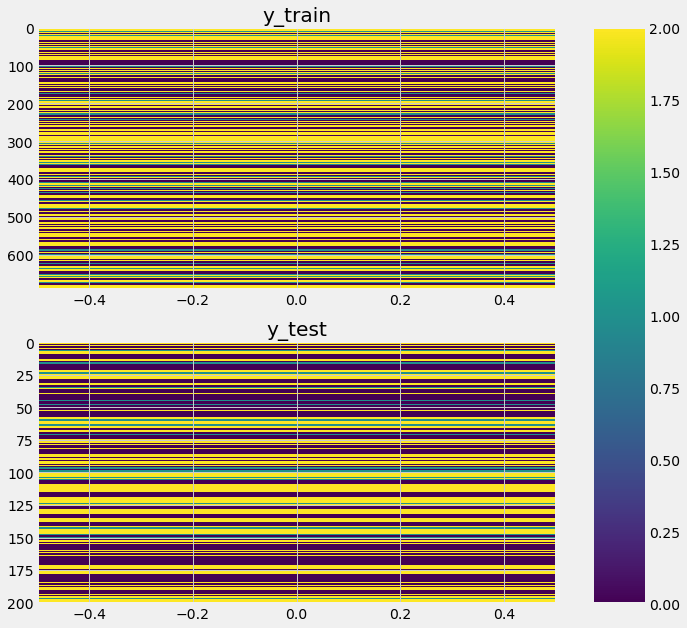

In [68]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('y_train')
plt.imshow(pd.DataFrame(y_train), interpolation='nearest', aspect='auto')
plt.subplot(212)
plt.title('y_test')
plt.imshow(pd.DataFrame(y_test), interpolation='nearest', aspect='auto')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [69]:
pd.DataFrame(pd.concat([X_train.sum(), X_test.sum()],axis=1 ))

,0,1
breast_density,1586,485
left or right breast_RIGHT,344,97
image view_MLO,145,39
abnormality id_2,6,3
abnormality id_3,1,1
abnormality id_4,0,1
mass shape_ASYMMETRIC_BREAST_TISSUE,12,2
mass shape_FOCAL_ASYMMETRIC_DENSITY,11,3
mass shape_IRREGULAR,197,62
mass shape_IRREGULAR-ARCHITECTURAL_DISTORTION,23,2


In [70]:
# for possible future cleaning: split fields by '_' before  and use each piece as a different binary

In [71]:
# above ensuring that all fields have at least one value

In [72]:
y_train.head()

0    2
1    0
2    2
3    2
6    0
dtype: int8

In [73]:
y_test.head()

4     2
5     2
11    0
13    2
22    0
dtype: int8

### 3.2. (5 points)
Repeat Question 3.1 for the test set - remember to make sure you have same number of columns for test and train set!
Use matplotlib.imshow(xtest, aspect='auto') to show the x dataset

In [74]:
X_test.shape

(201, 42)

In [75]:
X_train.shape

(691, 42)

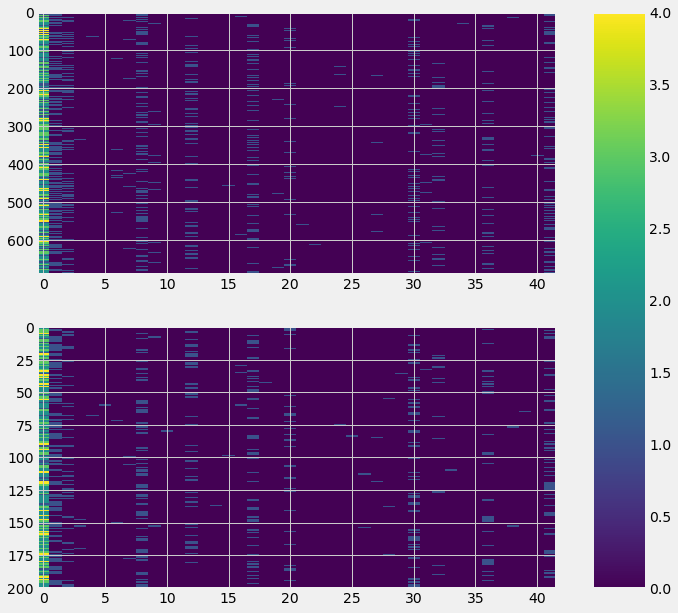

In [76]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.imshow(pd.get_dummies(X_train, drop_first=True), interpolation='nearest', aspect='auto')
plt.subplot(212)
plt.imshow(pd.get_dummies(X_test, drop_first=True), interpolation='nearest', aspect='auto')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

### 3.3. Logistic Regression (15 points)


### 3.3.a.

Design a multi-class logistic regression model which takes the input and outputs the probability of 3 classes. 

In [77]:
# references https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html
# https://medium.com/biaslyai/pytorch-linear-and-logistic-regression-models-5c5f0da2cb9
class LogisticRegression(torch.nn.Module):
    def __init__(self, in_feat, out_feat):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(in_feat, out_feat)
        # Define softmax output 
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.linear(x)
        x = self.softmax(x)
        return x
model = LogisticRegression(X_train.shape[1], 3)
        

In [78]:
# had trained model 

In [79]:
model.train()

LogisticRegression(
  (linear): Linear(in_features=42, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)

In [80]:
# would need to asjust the data shapes

In [81]:
def train(data, model, alpha=0.005, batch_size=34, num_epoch=50):
    X_train, y_train, X_test, y_test = data
    
    # Define loss function class, which contains both compute_loss and compute_gradient functionalities
    # if we used cross entropy loss than it would contain both softmax and 
    loss_fn = nn.MSELoss(reduction='mean')
    # Define method for updating parameters
    optimizer = optim.SGD(model.parameters(), lr=alpha)
    
    num_samples, num_features = X_train.shape
    num_batches = int(num_samples / batch_size)
    order = np.arange(num_samples)
    
    # Track performance
    best_test_loss = float('Inf')
    best_model = None
    train_loss_hist = []
    test_loss_hist = []
    loss_diff = 100
    i = 0
    
        ################ Your code here ################
    while (loss_diff > 10**(-5)) and i <= num_epoch:
        np.random.shuffle(order)
        minibatches = np.array_split(order, num_batches)
        i = i+1
        for j in range(num_batches):
            # Get batch input data of size (batch_size, num_features)
            batch = minibatches[j]

            # Set model to training mode and reset gradient
            model.train()
            model.zero_grad()
            # this is a precaution in that pytorch may not start with a zero gradient
            # you should zero gradient because back propagation step aka step backward below

            # Make model prediction using current batch data
            y_pred = model(X_train[batch]).squeeze()
            # compute_loss
            train_loss = loss_fn(y_pred, y_train[[batch]])
            train_loss_hist.append(train_loss.item())

            # compute_gradient-- all are computed
            train_loss.backward()
            # Step into gradient descent direction. Perform parameter update
            optimizer.step()

            # Evaluating performance on test set
            with torch.no_grad():
                model.eval()
                test_loss_hist.append(loss_fn(model(X_test).squeeze(), y_test))
                # Keep track of the model that gives rise to minimal loss on test data
                if test_loss_hist[-1] < best_test_loss:
                    best_model = model.state_dict() #important as you may lose information about model otherwise
                if len(test_loss_hist) >= 2:
                    loss_diff = abs(test_loss_hist[-2]-test_loss_hist[-1])
                    
    return (best_model, train_loss_hist, test_loss_hist)

In [82]:
def prep_data(data):
    return Variable(torch.from_numpy(np.array(data)).type(torch.FloatTensor))

In [83]:
data_for_model = [prep_data(x) for x in [X_train, pd.get_dummies(y_train.astype(str)), 
                                         X_test, pd.get_dummies(y_test.astype(str))]]

In [84]:
def plot_loss(res):
    best_theta, train_loss, test_loss = res
    x = np.arange(len(train_loss))
        
    plt.plot(x, train_loss, label="Train Loss")
    plt.plot(x, test_loss, label="Test Loss")
    
    plt.xlabel('Epochs/Steps')
    plt.ylabel('Loss')

    plt.legend()
    plt.show()

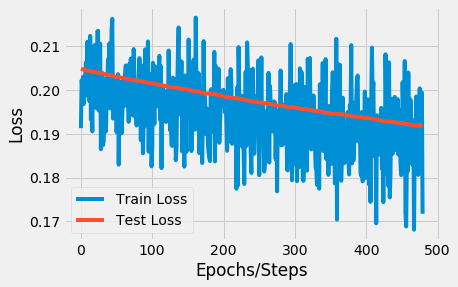

In [85]:
res = train(data_for_model, model)
plot_loss(res)  

### 3.3.b.
What are the sizes for your input and output?

In [86]:
X_train.shape
# input is 42 parameters

(691, 42)

In [87]:
y_train.shape
#output is 3 classifications

(691,)

In [88]:
predictions = model(prep_data(X_test))

In [89]:
X_test.shape

(201, 42)

In [90]:
predictions.shape

torch.Size([201, 3])

In [91]:
predictions

tensor([[0.4357, 0.0928, 0.4715],
        [0.3956, 0.1923, 0.4121],
        [0.4089, 0.1220, 0.4691],
        [0.4254, 0.1306, 0.4439],
        [0.3977, 0.1356, 0.4667],
        [0.4357, 0.0928, 0.4715],
        [0.3745, 0.1869, 0.4386],
        [0.4133, 0.1383, 0.4484],
        [0.3751, 0.1715, 0.4533],
        [0.3930, 0.1768, 0.4302],
        [0.4255, 0.1222, 0.4523],
        [0.4856, 0.1173, 0.3970],
        [0.4338, 0.2196, 0.3466],
        [0.4689, 0.1251, 0.4060],
        [0.3667, 0.1656, 0.4676],
        [0.4016, 0.1185, 0.4799],
        [0.4443, 0.1484, 0.4074],
        [0.3810, 0.1645, 0.4545],
        [0.3784, 0.1115, 0.5101],
        [0.4018, 0.1797, 0.4185],
        [0.3408, 0.2104, 0.4488],
        [0.4388, 0.0936, 0.4676],
        [0.4661, 0.1255, 0.4085],
        [0.4018, 0.1797, 0.4185],
        [0.5199, 0.1360, 0.3441],
        [0.3368, 0.2124, 0.4507],
        [0.4040, 0.1484, 0.4476],
        [0.3987, 0.1174, 0.4840],
        [0.3826, 0.1283, 0.4890],
        [0.408

In [92]:
predictions.max(dim=1)

torch.return_types.max(
values=tensor([0.4715, 0.4121, 0.4691, 0.4439, 0.4667, 0.4715, 0.4386, 0.4484, 0.4533,
        0.4302, 0.4523, 0.4856, 0.4338, 0.4689, 0.4676, 0.4799, 0.4443, 0.4545,
        0.5101, 0.4185, 0.4488, 0.4676, 0.4661, 0.4185, 0.5199, 0.4507, 0.4476,
        0.4840, 0.4890, 0.4334, 0.4531, 0.4471, 0.4373, 0.5266, 0.4840, 0.4183,
        0.4081, 0.4746, 0.4450, 0.5142, 0.5058, 0.4968, 0.4498, 0.4723, 0.4773,
        0.4704, 0.4840, 0.4676, 0.4640, 0.4164, 0.4498, 0.4736, 0.4103, 0.4242,
        0.4393, 0.5005, 0.4557, 0.4513, 0.4488, 0.5179, 0.4432, 0.4708, 0.4751,
        0.4338, 0.4563, 0.4264, 0.4751, 0.4611, 0.4337, 0.4391, 0.4594, 0.4905,
        0.4984, 0.4121, 0.4684, 0.4367, 0.4514, 0.4571, 0.4342, 0.4571, 0.4501,
        0.4488, 0.4513, 0.4691, 0.4712, 0.4441, 0.5058, 0.4121, 0.4459, 0.4849,
        0.4631, 0.4682, 0.4602, 0.4563, 0.5003, 0.4513, 0.4334, 0.4689, 0.4733,
        0.4218, 0.4275, 0.4273, 0.4373, 0.4103, 0.3991, 0.4766, 0.4275, 0.4342,
        0

In [93]:
# 1 (BENIGN_WITHOUT_CALLBACK) is rarely predicted, but it was a very small portion of the dataset to begin with 
# seems like this model errors on malignant detection. interesting to implementation as you wouldn't want to 
# tell a patient they have something malignant if they didn't, but it could be much worse to make the patient think 
# they are fine

### 3.3.c.
What type of activation function you will use and why?

using softmax as my activation function as it's Useful when the machine learning task is multi-class prediction
It is very similar to how binary works, but is more general 

### 3.3.d.
How many parameters you need to fit for your design?

In [113]:
model = LogisticRegression(X_train.shape[1], 3)

In [114]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [115]:
get_n_params(model)

129

also defined by 42 features * 3 outputs + 3 bias

In [117]:
model.parameters

<bound method Module.parameters of LogisticRegression(
  (linear): Linear(in_features=42, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)>

### 3.4. Multi-layered-perceptron (15 points)

Design a multi layer perceptron (MLP) with a single hidden layer which first maps the vectorized image to a vector of 100 then feeds this vector to a fully connected layer to get the probability of 3 classes.

You can choose optimizer and criterion of interest.

Plot the ***average loss on all the train samples*** per epoch. (Stop the training after 1000 epochs). 



In [95]:
# from lecture

In [96]:
def prep_data(data):
    i=0
    try: 
        data.shape[1]
        print (f'this is a x{i}')
        return Variable(torch.from_numpy(np.array(data)).type(torch.FloatTensor))
    except:
        print (f'this is a y{i}')
        return torch.from_numpy(np.array(data)).type(torch.LongTensor)
    i=+1

In [97]:
data_for_model = [prep_data(x) for x in [X_train, y_train, X_test, y_test]]

this is a x0
this is a y0
this is a x0
this is a y0


In [98]:
def plot_loss(res):
    best_theta, train_loss, test_loss = res
    x = np.arange(len(train_loss))
        
    plt.plot(x, train_loss, label="Train Loss")
    plt.plot(x, test_loss, label="Test Loss")
    
    plt.xlabel('Epochs/Steps')
    plt.ylabel('Loss')

    plt.legend()
    plt.show()

In [99]:
#using similar train to above

In [100]:
def train(data, model, alpha=0.005, batch_size=50, num_epoch=50):
    X_train, y_train, X_test, y_test = data
    
    # Define loss function class, which contains both compute_loss and compute_gradient functionalities
    # This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
    loss_fn = nn.CrossEntropyLoss(reduction='mean')
    # Define method for updating parameters
    optimizer = optim.SGD(model.parameters(), lr=alpha)
    
    num_samples, num_features = X_train.shape
    num_batches = int(num_samples / batch_size)
    order = np.arange(num_samples)
    
    # Track performance
    best_test_loss = float('Inf')
    best_model = None
    train_loss_hist = []
    test_loss_hist = []
    loss_diff = 100
    i = 0
    
    while (loss_diff > 10**(-5)) and i <= num_epoch:
        np.random.shuffle(order)
        minibatches = np.array_split(order, num_batches)
        
        for j in range(num_batches):
            i = i+1
            # Get batch input data of size (batch_size, num_features)
            batch = minibatches[j]

            # Set model to training mode and reset gradient
            model.train()
            model.zero_grad()
            # this is a precaution in that pytorch may not start with a zero gradient
            # you should zero gradient because back propagation step aka step backward below

            # Make model prediction using current batch data
            y_pred = model(X_train[batch])
            # compute_loss
            
            train_loss = loss_fn(y_pred, y_train[batch].long())
            train_loss_hist.append(train_loss.item())

            # compute_gradient-- all are computed
            train_loss.backward()
            # Step into gradient descent direction. Perform parameter update
            optimizer.step()

            # Evaluating performance on test set
            with torch.no_grad():
                model.eval()
                test_loss_hist.append(loss_fn(model(X_test).squeeze(), y_test))
                # Keep track of the model that gives rise to minimal loss on test data
                if test_loss_hist[-1] < best_test_loss:
                    best_model = model.state_dict() #important as you may lose information about model otherwise
                if len(test_loss_hist) >= 2:
                    loss_diff = abs(test_loss_hist[-2]-test_loss_hist[-1])
                    
    return (best_model, train_loss_hist, test_loss_hist)

In [101]:
# modified from lecture

In [102]:
class MLPNet(torch.nn.Module):
    # multiple linear layers
    def __init__(self, in_features, hidden_size=3, out_features=1):
        super(MLPNet, self).__init__()
        self.fc1 = torch.nn.Linear(in_features, hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, out_features)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # apply relu, sigmoid and softmax in between hidden 
        x = torch.nn.functional.relu(self.fc1(x))
#         x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.softmax(x)
        
        return x


### 3.5. (10 points)
Add the loss of the test set to the loss of the train set and plot the ***average loss on all the test samples*** per epoch. (Stop the training after 100 epochs)

In [103]:
model.train()

LogisticRegression(
  (linear): Linear(in_features=42, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)

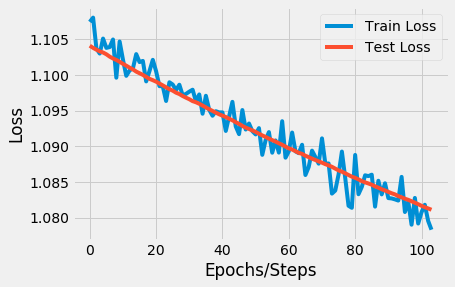

In [104]:
model = MLPNet(X_train.shape[1], hidden_size=100, out_features=3)
res = train(data_for_model, model,  num_epoch=100)
plot_loss(res)  

In [105]:
predictions = model(data_for_model[2])

In [106]:
predictions.max(dim=1)

torch.return_types.max(
values=tensor([0.3779, 0.3618, 0.3738, 0.3630, 0.3895, 0.3779, 0.3556, 0.3707, 0.3658,
        0.3413, 0.3698, 0.3727, 0.3530, 0.3743, 0.3623, 0.3870, 0.3579, 0.3583,
        0.3574, 0.3647, 0.3450, 0.3807, 0.3799, 0.3647, 0.3640, 0.3415, 0.3774,
        0.3877, 0.3740, 0.3599, 0.3661, 0.3685, 0.3568, 0.3644, 0.3806, 0.3581,
        0.3339, 0.3751, 0.3663, 0.3704, 0.3679, 0.3608, 0.3689, 0.3569, 0.3849,
        0.3724, 0.3806, 0.3623, 0.3552, 0.3571, 0.3689, 0.3724, 0.3489, 0.3531,
        0.3770, 0.3704, 0.3783, 0.3490, 0.3450, 0.3668, 0.3503, 0.3677, 0.3519,
        0.3530, 0.3682, 0.3540, 0.3519, 0.3555, 0.3470, 0.3714, 0.3615, 0.3840,
        0.3477, 0.3618, 0.3596, 0.3469, 0.3856, 0.3624, 0.3645, 0.3598, 0.3563,
        0.3450, 0.3490, 0.3738, 0.3721, 0.3669, 0.3679, 0.3618, 0.3713, 0.3668,
        0.3803, 0.3643, 0.3524, 0.3682, 0.3798, 0.3490, 0.3599, 0.3743, 0.3817,
        0.3576, 0.3473, 0.3635, 0.3568, 0.3489, 0.3523, 0.3646, 0.3554, 0.3645,
        0

In [107]:
# predicting benign more often then not here and no predictions of the low occuring BENIGN_WITHOUT_CALLBACK

### 3.6. (3 points)
Define two types of activation functions you can use in the first layer. Which activation function you will use on the second fully connected layer?

In the first layer using relu and sigmoid, which may possibly be considered redundant since Gradients can vanish on sigmoid non-linearity, so it was recommended we use relu instead. upon fur

in the second layer I used softmax as before for multiclass prediction


### 3.7. (3 points)
How many parameters you need to fit for your design? How does adding another hidden layer effected the number of parameters to use?

In [125]:
list(model.parameters())[0].size()

torch.Size([100, 42])

-hidden layer adds to the parameters

-first layer = 42 *100

-hidden layer adds 100 

-sigmoid adds 300 

-and softmax/ bias adds 3



In [137]:
get_n_params(model)

4603

In [ ]:
#calculated multiples ways for accuracy

In [110]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])

In [111]:
params

4603

adding another hidden layer adds in more parameters... I of course added many additions to my model, but the hidden layer contributed 100 parameters